## HW 3

## 1. (6 points) This question discusses about the LASSO and Ridge regression techniques.





* (i) What is the main difference between LASSO and Ridge Regression?(1 point)

The main difference between LASSO and Ridge Regression is Ridge adds a L2 penalty on the sum of the squared regression parameters and LASSO adds a L1 penalty to the SSE. Basically, LASSO regression is able to make the coefficients of predictors deemed useless, zero, while ridge regression will keep every predictor, but make the less usefull predictor's coefficents very small. 

* (ii) Is one method better than another, explain your reasoning? (1 point)

No, they both have their place for modeling. LASSO is great if you want to simplify the model by eliminating some of the predictors. Ridge is great if you want to keep all the predictors and help stabalize the model due to multicollinearity problems. 

* (iii) Write the advantages and disadvantages of LASSO Regression. (2 points)

Advantages:
Can help identify and elimnate low impact predictors. 
Simplifies the model.
Helps prevent overfitting.

Disadvantages:
Lowers predictive power.
Potential underfitting.

* (iv) Write the advantages and disadvantages of Ridge Regression. (2 points)

Advantages: 
Higer predictive power.

Disadvantages:
Keeps in predictors that potentially have no relation to the target variable.
More complex model, so interpretability is harder. 

## 2. (12 points) This problem involves the Advertising data set which is provided to you. Here is a scenario. Suppose that you are statistical consultant hired by a client to investigate the association between advertising and sales of a particular product. The Advertising data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper. It is not possible for our client to directly increase sales of the product. On the other hand, they can control the advertising expenditure in each of the three media. Therefore, if we determine that there is an association between advertising and sales, then we can instruct our client to adjust advertising budgets, thereby indirectly increasing sales. In other words, our goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets. In this setting, the advertising budgets are input variables or predictors while sales is an output variable or response. We will now try to predict sales using the other variables in this data set. In the Advertising data set, sales, is measured in thousands of units, and TV, radio, and newspaper budgets, are measured in thousands of dollars. 










* (i) Split the data with 80 percent of data into training and 20 percent to the test set. Then scale the X train and X test data using Standard Scalar.

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',3000)
plt.style.use('seaborn') # a style that can be used for plots - see style reference above

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
#warnings.filterwarnings('ignore')

C:\Users\mwarl\AppData\Local\Temp\ipykernel_16324\2336519667.py:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') # a style that can be used for plots - see style reference above


In [2]:
# read in data
df_AD = pd.read_csv(r"C:\Users\mwarl\OneDrive - Middle Tennessee State University\Desktop\Advertising (1).csv", index_col = 0, header = 0)

In [3]:
# print info 
print(df_AD.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None


In [4]:
X = df_AD.drop('sales', axis = 1)

#keep target variable only for y
y = df_AD['sales'] 

#split the train test, here we are doing 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)



In [5]:
# import scaling libraries and assign to variables

from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer, StandardScaler

sc = StandardScaler()
mm = MinMaxScaler()
rb = RobustScaler()
nm = Normalizer()


In [6]:
# fit the data i.e calculate the mean and sd of each coluns of X_train
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

* (ii) Fit a LASSO regression on the training data using sales as target variable and all other variables as the predictors using alpha = 2. Are all the predictors statistically significant? Predict on the test dataset and report the RMSE and MAPE. (2 points)

In [7]:
# assign our alpha value
lasso = Lasso(alpha=2)

In [8]:
# fit the model
lasso_model = lasso.fit(X_train_sc, y_train)

# builds an array of the coefficents
lasso_coef = lasso_model.coef_

# puts the coefficents in a df
df_lasso = pd.DataFrame([lasso_coef])

# merges the dfs together and prints it. this will tell us what features are being used. 
df_lasso = pd.DataFrame(lasso_coef)
names = pd.DataFrame(list(X.columns))
df_lasso  = pd.concat([names, df_lasso], axis = 1)
df_lasso .columns = ['Feature', 'lasso_coeff']
df_lasso  = df_lasso .sort_values(by='lasso_coeff', ascending = False)
df_lasso_sig = df_lasso[df_lasso['lasso_coeff']!=0]
df_lasso_sig

,Feature,lasso_coeff
0,TV,1.866331
1,radio,0.916272


From this, we can see that newspaper is not statistically significant because it's coefficient is zero. 

In [9]:
# predict on the data set
y_pred = lasso.predict(X_test_sc)

# calculate RMSE and MAPE
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mape = mean_absolute_percentage_error(y_test, y_pred)


# print the results
print(f' the test RMSE is:{test_rmse}')
print(f' the test MAPE is:{test_mape}')


 the test RMSE is:3.5451305793535983
 the test MAPE is:0.2663034957305409


* (iii) Write the LASSO regression equation. Predict the sales for the new data point in which TV = 137, radio = 10, newspaper = 14. (2 points)

In [10]:
# find the intercept
intercept = lasso_model.intercept_

print(intercept)

14.1


In [11]:
# reprint the coefficients
df_lasso_sig

,Feature,lasso_coeff
0,TV,1.866331
1,radio,0.916272


Our LASSO regression equation is Sales (scaled)=14.1+1.866331×TV (scaled)+0.916272×radio (scaled)

In [12]:
# build a new data frame with our desired predictors
new_data = np.array([[137, 10, 14]])
scaled_new_data = sc.transform(new_data)

# predict off of our new df
predicted_sales = lasso_model.predict(scaled_new_data)
print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 13.011909717725494


C:\Users\mwarl\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\mwarl\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


* (iv) Find the optimal value of alpha for LASSO regression using grid search cross validation using all training dataset. What is the best alpha value? (2 points)

iteration 1e-05 done
iteration 5e-05 done
iteration 0.0001 done
iteration 0.0005 done
iteration 0.001 done
iteration 0.005 done
iteration 0.01 done
iteration 0.02 done


<Figure size 2000x1000 with 0 Axes>

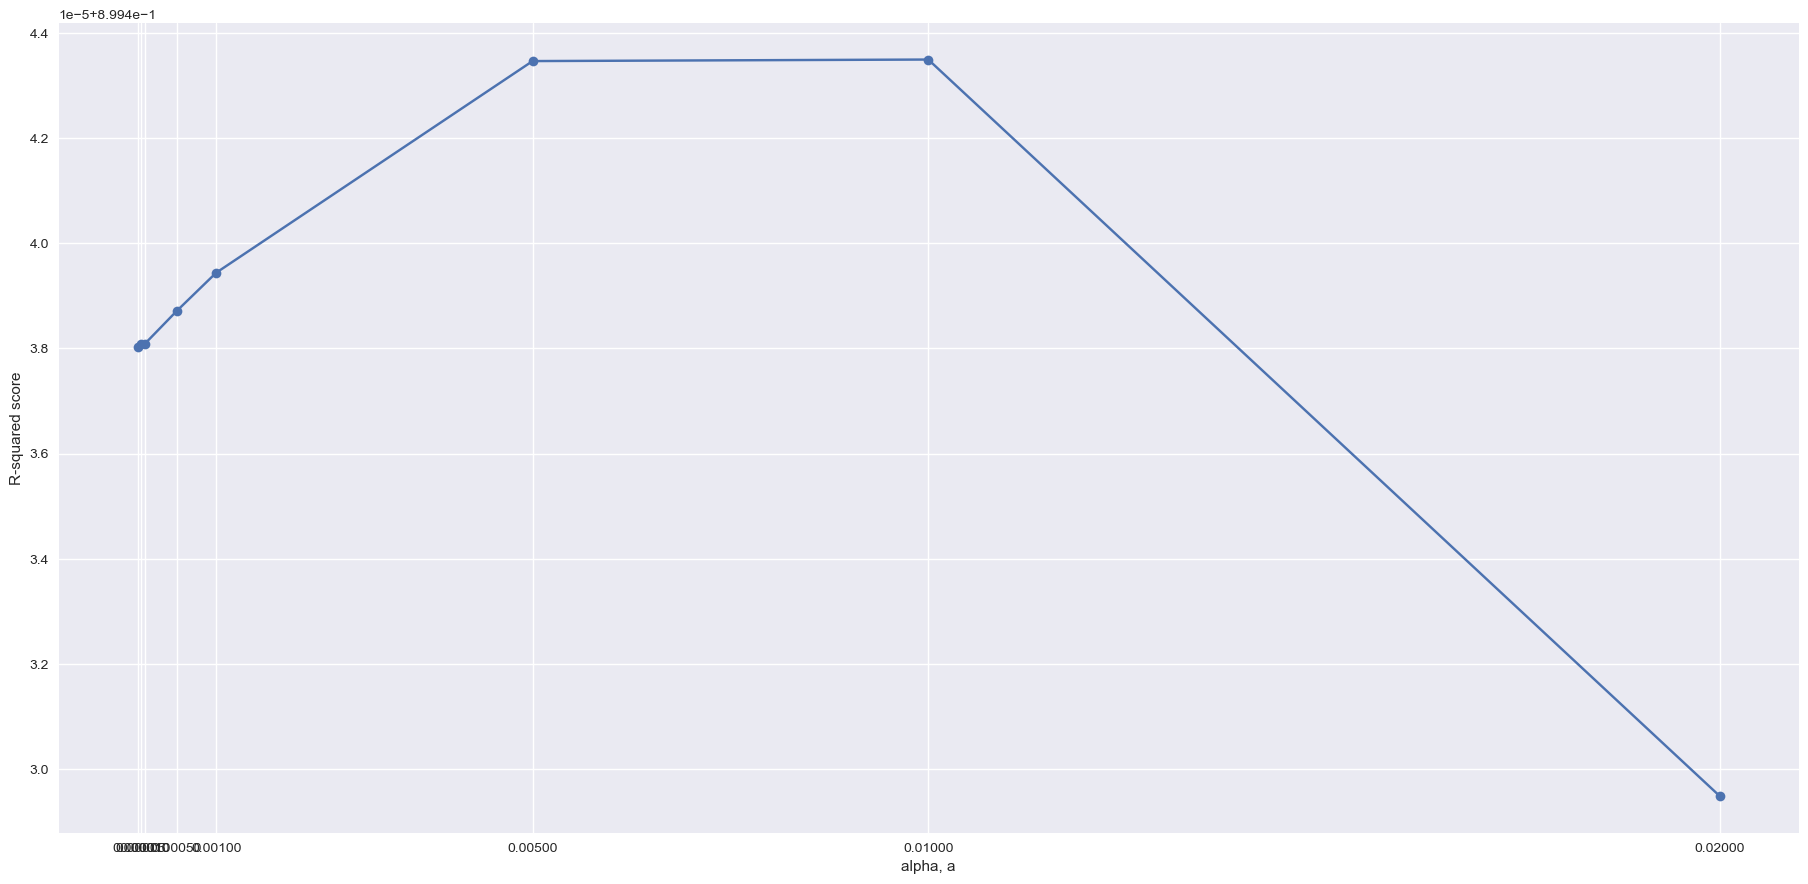

In [13]:
plt.figure(figsize=(20,10))


plt.figure(figsize=(20, 10))

alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, .02]
scores = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=True)
    lasso.fit(X_train_sc, y_train)  # Fit the Lasso model
    score = lasso.score(X_test_sc, y_test)  # Calculate the R-squared score
    scores.append(score)
    print("iteration {} done".format(a))

plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('R-squared score')
plt.xticks(alphas)
plt.show()

Based upon this graph, we can see that our alpha will most likely be between .005 and .01. When we do our grid search, we will need to search around these points, to find the best value. 

In [14]:
model = Lasso(fit_intercept=True, max_iter=1000)

# define model evaluation method
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
# define grid
grid = dict()
grid['alpha'] = arange(.000001, .01, .005)
# define search
search = GridSearchCV(model, grid, scoring = 'neg_mean_squared_error', cv = cv)
# perform the search
results = search.fit(X_train_sc, y_train)

In [15]:
print('MSE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MSE: -2.880
Config: {'alpha': 0.005001}


So the best value for alpha for our model using cross validation is .005

* (v) Fit a LASSO regression on the training data using the best alpha chosen, with sales as target variable and all other variables as the predictors. Predict on the test dataset and report the RMSE and MAPE. Did you see the improvement in the RMSE and MAPE scores? (2 points)

In [16]:
# set the new alpha
lasso = Lasso(alpha=.005)

# fit the model
best_lasso_model = lasso.fit(X_train_sc, y_train)

# predict on the data set
y_pred = best_lasso_model.predict(X_test_sc)

# calculate RMSE and MAPE
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mape = mean_absolute_percentage_error(y_test, y_pred)


# print the results
print(f' the test RMSE is:{test_rmse}')
print(f' the test MAPE is:{test_mape}')
print('\n')
print(f'the previous test RMSE was :3.5451305793535983 \n the previous test MAPE was:0.2663034957305409')


 the test RMSE is:1.7815514763320965
 the test MAPE is:0.15185634980527016


the previous test RMSE was :3.5451305793535983 
 the previous test MAPE was:0.2663034957305409


We want RMSE and MAPE to be as low as possible, so we did see a significant improvment in our model testing by making the alpha the best value accoriding to our cross validation. 

* (vi) Write the LASSO regression equation. Predict the sales for the new data point in which
TV = 137, radio = 10, newspaper = 14. (2 points)

In [17]:
# find the intercept
intercept = best_lasso_model.intercept_

print(intercept)

14.100000000000001


In [18]:
# builds an array of the coefficents
lasso_coef = best_lasso_model.coef_

# puts the coefficents in a df
df_lasso = pd.DataFrame([lasso_coef])

# merges the dfs together and prints it. this will tell us what features are being used. 
df_lasso = pd.DataFrame(lasso_coef)
names = pd.DataFrame(list(X.columns))
df_lasso  = pd.concat([names, df_lasso], axis = 1)
df_lasso .columns = ['Feature', 'lasso_coeff']
df_lasso  = df_lasso .sort_values(by='lasso_coeff', ascending = False)
df_lasso_sig = df_lasso[df_lasso['lasso_coeff']!=0]
df_lasso_sig

,Feature,lasso_coeff
0,TV,3.759442
1,radio,2.788975
2,newspaper,0.052359


Our best LASSO regression equation is Sales (scaled)=14.1+3.76 × TV (scaled)+ 2.79 × radio (scaled) + .052 x newspaper (scaled)

In [19]:
# build a new data frame with our desired predictors
new_data = np.array([[137, 10, 14]])
scaled_new_data = sc.transform(new_data)

# predict off of our new df
predicted_sales = best_lasso_model.predict(scaled_new_data)
print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 11.044104002922461


C:\Users\mwarl\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\mwarl\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


(vii) (Bonus) Create appropriate interactive visualization for the lasso regression residuals that
provides new insights to your results. (2 points)

<Figure size 2000x1000 with 0 Axes>

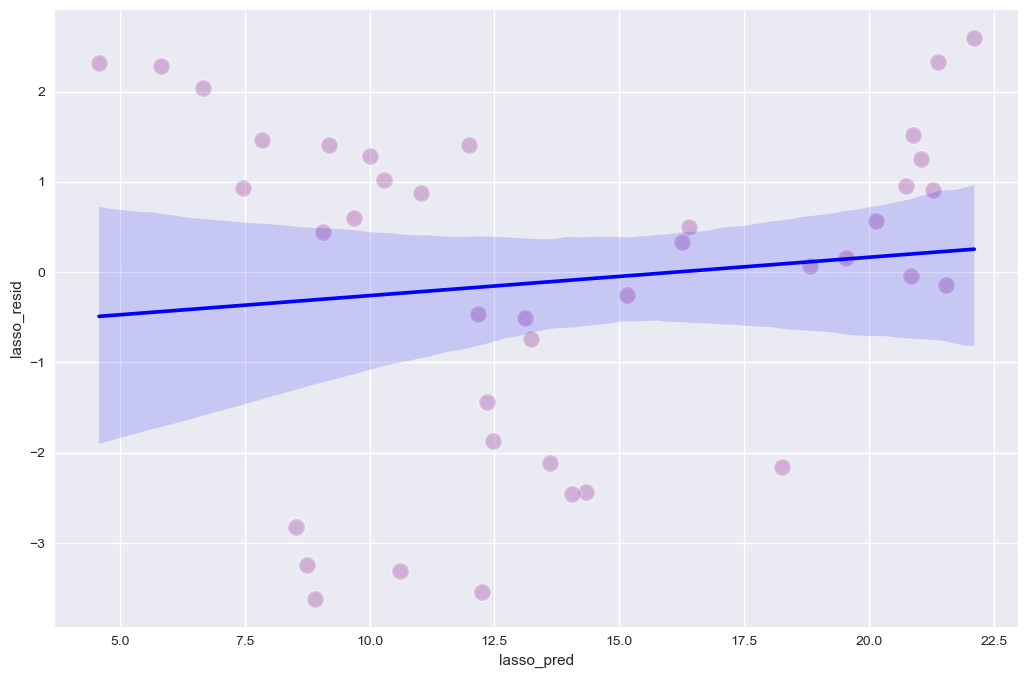

In [20]:
lasso_model = Lasso(alpha=0.005)  # Replace with your Lasso model parameters
lasso_model.fit(X_train_sc, y_train)

# Make predictions using the Lasso model
lasso_pred = lasso_model.predict(X_test_sc)

# Calculate residuals
lasso_resid = y_test - lasso_pred

# Create a DataFrame to store the results
df_results = pd.DataFrame({'lasso_pred': lasso_pred, 'lasso_resid': lasso_resid, 'Actual': y_test})

# Now, you can use df_results to create your scatterplot
plt.figure(figsize=(20, 10))
sns.lmplot(x='lasso_pred', y='lasso_resid', data=df_results, palette="Set1", height=7,
           aspect=1.5, scatter_kws={"alpha": 0.25, "s": 150, "linewidth": 2, "color": "purple", "edgecolor": "white"}, line_kws={'color': 'blue'})
plt.show()

As we can see, there isn't a pattern for the most part, which is what we want to see. 

## 3. (12 points) This problem involves the Advertising data set which is provided to you and explained as in previous problem. We will now try to predict sales using the other variables in this data set. In other words, sales is the response, and all other variables are the predictors.

* (i) Split the data with 80 percent of data into training and 20 percent to the test set. Then
scale the X train and X test data using Standard Scalar.


In [38]:
X = df_AD.drop('sales', axis = 1)

#keep target variable only for y
y = df_AD['sales'] 

#split the train test, here we are doing 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# fit the data i.e calculate the mean and sd of each coluns of X_train
sc.fit(X_train)

#transform the train data
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

#transform the test data
X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

* (ii) Fit the Ridge regression on the training data using all the predictors and use alpha = 2. Are all the predictors statistically significant? Predict on the test dataset and report the RMSE and MAPE. (2 points)


In [39]:
# set the alpha and iterations
ridge = Ridge(alpha=2, fit_intercept=True, max_iter=3000)

In [40]:
# fit the Ridge model
ridge_model = ridge.fit(X_train_sc, y_train)

# extract the coefficients
ridge_coef = ridge_model.coef_

# create a DataFrame to store feature names and their Ridge coefficients
df_ridge = pd.DataFrame({'Feature': X.columns, 'ridge_coeff': ridge_coef})


print(df_ridge)

     Feature  ridge_coeff
0         TV     3.719455
1      radio     2.754619
2  newspaper     0.070573


All of the predictors are significant because their coefficients are not zero. This makes sense because ridge does not eleminate predictors

In [24]:
# make the predictions
ridge_predictions = ridge_model.predict(X_test_sc)

# calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
mape = mean_absolute_percentage_error(y_test, ridge_predictions)


print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 1.7932502801080406
MAPE: 0.15204081862639987


This is very good. It is almost as low as our best lasso model.

* (iii) Write the Ridge regression equation. Predict the sales for the new data point in which TV = 137, radio = 10, newspaper = 14. (2 points)


In [25]:
# print the coefficents and the intercept
print(df_ridge)
print(ridge.intercept_)

     Feature  ridge_coeff
0         TV     3.719455
1      radio     2.754619
2  newspaper     0.070573
14.100000000000001


Our ridge regression equation is Sales (scaled)=14.1+3.72 × TV (scaled)+ 2.75 × radio (scaled) + .07 x newspaper (scaled)

In [26]:
# build a new data frame with our desired predictors
new_data = np.array([[137, 10, 14]])
scaled_new_data = sc.transform(new_data)

# predict off of our new df
predicted_sales = ridge_model.predict(scaled_new_data)
print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 11.06593605999754


C:\Users\mwarl\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\mwarl\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


*  Find the optimal value of alpha for Ridge regression using grid search cross validation using all training dataset. What is the best alpha value? (2 points)


iteration 0.0001 done
iteration 0.0005 done
iteration 0.001 done
iteration 0.005 done
iteration 0.01 done
iteration 0.05 done
iteration 0.1 done
iteration 0.25 done
iteration 0.5 done


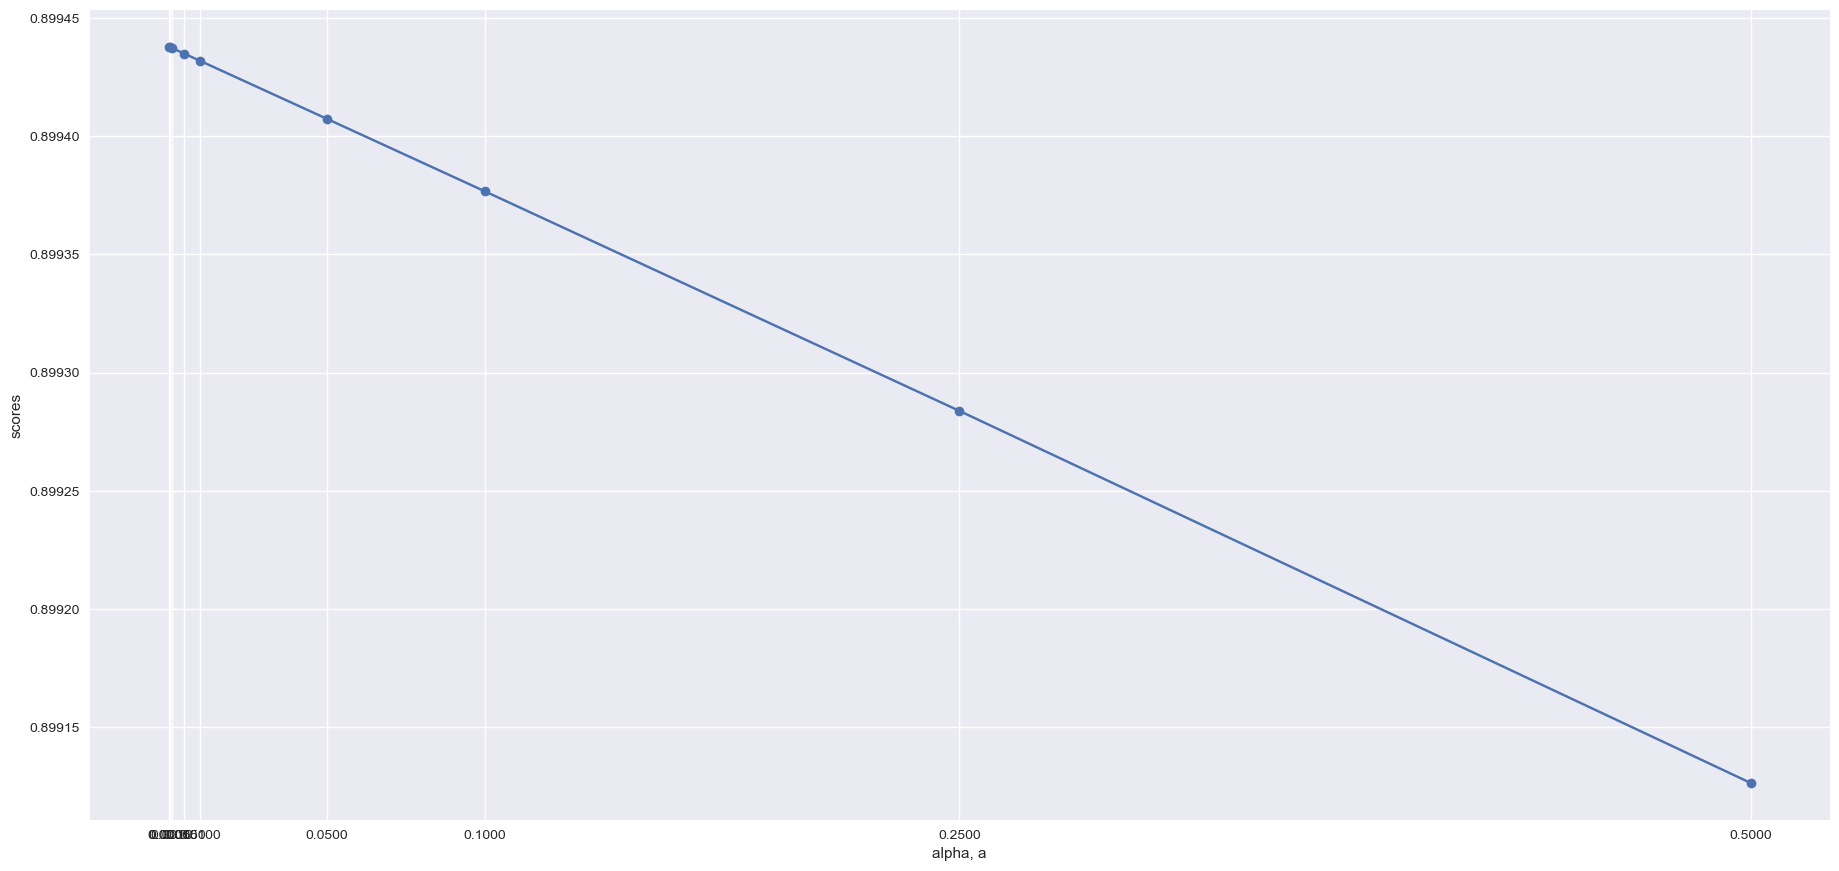

In [27]:
plt.figure(figsize=(20,10))

alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01,  0.05, 0.1, 0.25, 0.5]
#alphas = [0.1, 0.5, 1, 5, 10, 25, 50, 100]
scores = []

for a in alphas:
    ridge = Ridge(alpha = a, fit_intercept=True)
    ridge.fit(X_train_sc, y_train)
    scores.append(ridge.score(X_test_sc, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()


iteration 1e-05 done
iteration 5e-05 done
iteration 0.0001 done
iteration 0.0005 done
iteration 0.001 done
iteration 0.005 done
iteration 0.01 done


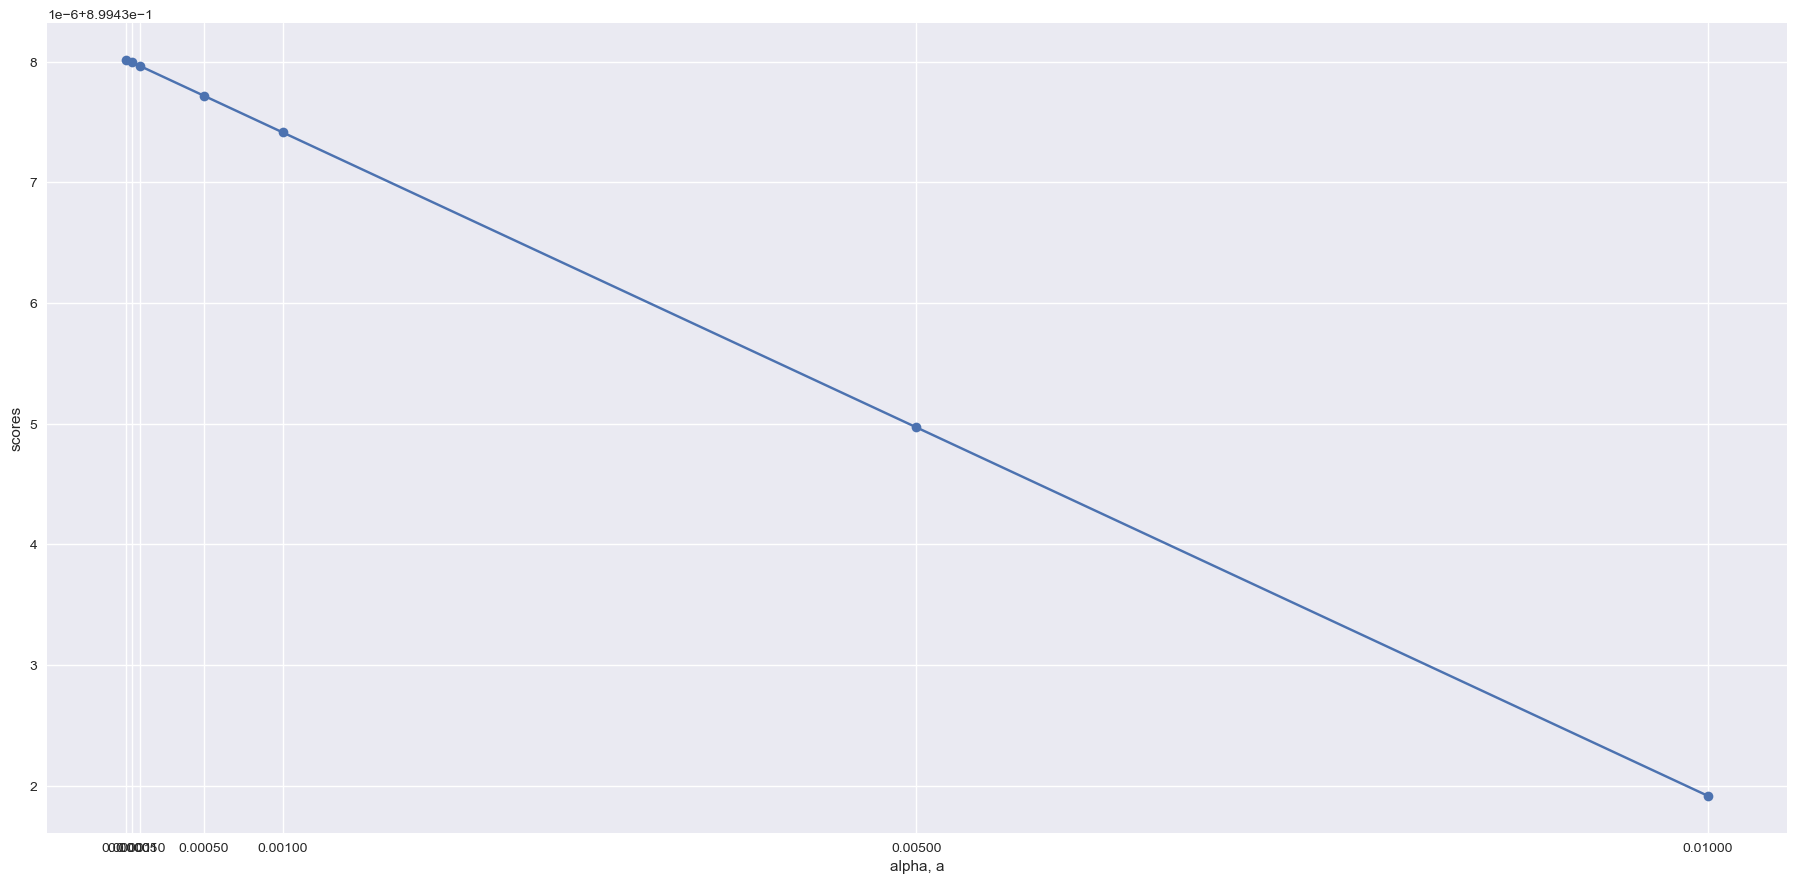

In [28]:
plt.figure(figsize=(20,10))

alphas = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01]
#alphas = [0.1, 0.5, 1, 5, 10, 25, 50, 100]
scores = []

for a in alphas:
    ridge = Ridge(alpha = a, fit_intercept=True)
    ridge.fit(X_train_sc, y_train)
    scores.append(ridge.score(X_test_sc, y_test))
    print("iteration {} done".format(a))


plt.plot(alphas, scores, '-o')
plt.xlabel('alpha, a')
plt.ylabel('scores')
plt.xticks(alphas)
plt.show()

From these graphs, we can see that our alpha will be very small. 

In [35]:
model = Ridge(fit_intercept=True, max_iter=1000)

# Define cross validation approach
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)

# Define search grid for alpha hyperparameter
search_grid = dict()
# Set range and increments within range
search_grid['alpha'] = arange(.000001, .001, .005)

# Define and perform the search
search = GridSearchCV(model, search_grid, scoring='r2', cv=cv, n_jobs=-1)
search_results = search.fit(X_train_sc, y_train)

# Show "optimal" hyperparameter setting and performance measure
print('Best Ridge Regression Hyperparameter Setting from Grid Search')
print('Ridge Config: %s'   % search_results.best_params_)
print('Best Value for Scoring Method: %.5f' % search_results.best_score_)

Best Ridge Regression Hyperparameter Setting from Grid Search
Ridge Config: {'alpha': 1e-06}
Best Value for Scoring Method: 0.87241


The best alpha for my ridge model is .000001

* (v) Fit Ridge regression on the training data using the best alpha chosen, with sales as target variable and all other variables as the predictors. Predict on the test dataset and report the RMSE and MAPE. Did you see the improvement in the RMSE and MAPE scores? (2 points)

In [33]:
# set the alpha and iterations
ridge = Ridge(alpha=.000001, fit_intercept=True, max_iter=3000)

# fit the Ridge model
best_ridge_model = ridge.fit(X_train_sc, y_train)

# extract the coefficients
ridge_coef = best_ridge_model.coef_

# create a DataFrame to store feature names and their Ridge coefficients
df_ridge = pd.DataFrame({'Feature': X.columns, 'ridge_coeff': ridge_coef})


print(df_ridge)
# make the predictions
ridge_predictions = best_ridge_model.predict(X_test_sc)

# calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
mape = mean_absolute_percentage_error(y_test, ridge_predictions)


print("RMSE:", rmse)
print("MAPE:", mape)

     Feature  ridge_coeff
0         TV     3.764196
1      radio     2.792307
2  newspaper     0.055976
RMSE: 1.7815996669414051
MAPE: 0.15198846604985636


This RMSE and MAPE are better, but only slightly better than when my model had an alpha of 2. 

In [31]:
# build a new data frame with our desired predictors
new_data = np.array([[137, 10, 14]])
scaled_new_data = sc.transform(new_data)

# predict off of our new df
predicted_sales = best_ridge_model.predict(scaled_new_data)
print("Predicted Sales:", predicted_sales[0])

Predicted Sales: 11.037617388757226


C:\Users\mwarl\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\mwarl\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


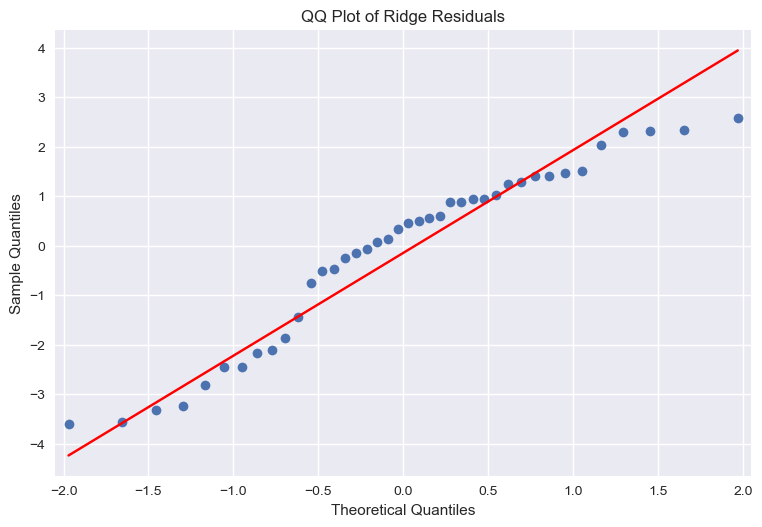

In [32]:
# calculate the predictions against the test data set and calculate the residuals
ridge_predictions = best_ridge_model.predict(X_test_sc)
ridge_residuals = y_test - ridge_predictions

# create the qq plot
sm.qqplot(ridge_residuals, line='q')  # 'line' argument adds a reference line
plt.title("QQ Plot of Ridge Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Display the plot
plt.show()

Looking at this qq plot of the ridge residuals, we can see that we are pretty close to the linear line meaning that we have met the criteria of our residuals having normality. 